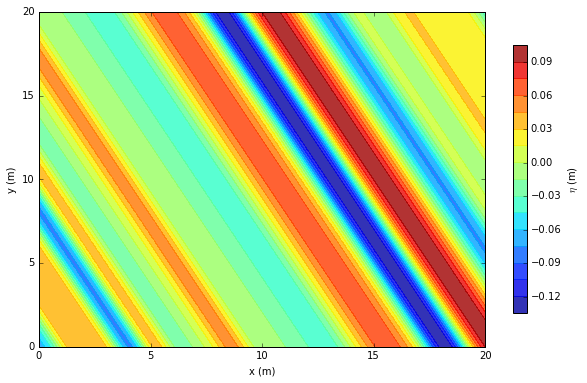

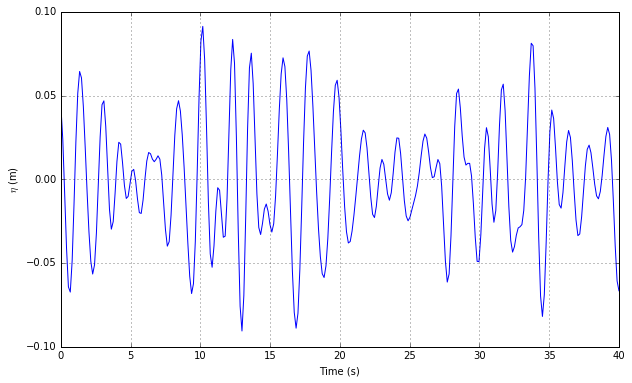

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import imp
#The paths in the two following lines need to be changed, depending on the location of the modules
#The notebook will work with the following commits:
#WaveTools.py: https://github.com/erdc/proteus/commit/5db78fc77b50e26540188bef890259437c83ef4d
#Profiling.py: https://github.com/erdc/proteus/commit/9f4c66a59414f97861246f6fd66214ac67d849d1
Profiling = imp.load_source('Profiling', 'C:/Users/gkm/Desktop/WaveTools_nb/Profiling.py')
WT = imp.load_source('WaveTools', 'C:/Users/gkm/Desktop/WaveTools_nb/WaveTools.py')
import numpy as np


#Setting up the plan view area
n=151
xi = np.linspace(0, 20, n)
yi = np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)


#Setting up wave properties
Tp = 2.
Hs = 0.15
mwl = 0.
depth = 1.
g = np.array([0., 0., -9.81])
N = 101
bandFactor = 2.0
spectName = "PM_mod"
spectral_params = None
phi = None
waveDir = np.array([1., 2., 0.])


#Calling the class
RW = WT.RandomWaves(Tp,
                 Hs,
                 mwl,
                 depth,
                 waveDir,
                 g,
                 N,
                 bandFactor,
                 spectName,
                 spectral_params,
                 phi
                )


#Calculating the free surface elevation calculated from MWL using a 2D plane  
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = RW.eta(x, 0.)

        
#Plotting the contour         
plt.figure(figsize=(10, 6), dpi=100)
X,Y = np.meshgrid(xi,yi)
CS = plt.contourf(X,Y,eta_t, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=10)
plt.ylabel("y (m)", size=10)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 10)
plt.show()


#Setting up a time interval of n periods (using npoints sampling points per period)
nperiod = 20
npoints = 15
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*Tp,n)
eta_t = np.zeros(len(tnlist),)


#Calculating time series
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = RW.eta(x, t)

    
#Plotting time series
plt.figure(2, figsize=(10,6), dpi=100)
plt.xlim(0., nperiod*Tp)
plt.plot(tnlist, eta_t)
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.grid()
plt.show()
